# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Virandy Bagaskara Syahwanto
- **Email:** randy.bagaskara25@gmail.com
- **ID Dicoding:** virandybagaskara

## Menentukan Pertanyaan Bisnis

- Berapakah jumlah peminjaman sepeda selama akhir pekan (Weekend) dengan hari biasa (Weekdays)?
- Berapakah rata-rata angka peminjaman sepeda berdasarkan kondisi cuaca?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Melakukan pembukaan file dengan pd.read_csv. Disini, kita akan memanggil file day.csv dan hour.csv

In [2]:
daysbd_df = pd.read_csv("/content/day.csv")
daysbd_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hoursbd_df = pd.read_csv("/content/hour.csv")
hoursbd_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Selanjutnya, melakukan proses Assessing Data atau penilaian terhadap data.

In [4]:
daysbd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
hoursbd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari hasil assessing tersebut, didapatkan kesalahan tipe data pada column dteday yang seharusnya bertipe data datetime.

In [6]:
daysbd_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
hoursbd_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Setelah diperiksa, ditemukan bahwa tidak terdapat missing value pada data tersebut.

In [8]:
print("Jumlah duplikasi pada day.csv : ", daysbd_df.duplicated().sum())

Jumlah duplikasi pada day.csv :  0


In [9]:
print("Jumlah duplikasi pada hour.csv : ", hoursbd_df.duplicated().sum())

Jumlah duplikasi pada hour.csv :  0


Setelah diperiksa, tidak ditemukan ada duplikasi data.

In [10]:
daysbd_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
hoursbd_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Setelah diperiksa, semua nilai yang terkandung sesuai dengan ketentuan pada readme.txt.

### Cleaning Data

Melakukan penghapusan beberapa column seperti hum dan windspeed karena column tersebut tidak diperlukan.

In [12]:
daysbd_df.drop(['hum', 'windspeed'], axis=1, inplace=True)
hoursbd_df.drop(['hum', 'windspeed'], axis=1, inplace=True)

Melakukan perubahan tipe data. Ditemukan kesalahan tipe data pada data day dan hour, column dteday. Selain itu, merubah tipe data pada column workingday.

In [13]:
daysbd_df['dteday'] = daysbd_df['dteday'].astype('datetime64')
hoursbd_df['dteday'] = hoursbd_df['dteday'].astype('datetime64')

daysbd_df['workingday'] = daysbd_df['workingday'].astype('object')
hoursbd_df['workingday'] = hoursbd_df['workingday'].astype('object')

In [14]:
daysbd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(10), object(1)
memory usage: 80.1+ KB


In [15]:
hoursbd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  casual      17379 non-null  int64         
 13  registered  17379 non-null  int64         
 14  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(11), object(1)
memory usage: 2

Selanjutnya, melakukan perubahan pada beberapa nama column agar mudah dibaca.
Nama column yang dirubah yaitu dteday, yr, mnth, weathersit, dan cnt.

In [16]:
daysbd_df.rename(columns={'dteday': 'datetime', 'yr': 'year', 'mnth': 'month', 'weathersit': 'condition_weather',  'cnt': 'count'}, inplace=True)

daysbd_df.head()

,instant,datetime,season,year,month,holiday,weekday,workingday,condition_weather,temp,atemp,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,82,1518,1600


Selanjutnya merubah beberapa parameter yang awalnya berupa angka menjadi sebuah string yang lebih jelas dibaca.

In [17]:
daysbd_df['month'] = daysbd_df['month'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'Augustus', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})
daysbd_df['season'] = daysbd_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
daysbd_df['weekday'] = daysbd_df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
daysbd_df['condition_weather'] = daysbd_df['condition_weather'].map({
    1: 'C and the other',
    2: 'M+C and the other',
    3: 'LS and the other',
    4: 'HR and the other'
})

daysbd_df['workingday'] = daysbd_df['workingday'].map({1: 'Weekdays', 0: 'Weekend' })

daysbd_df.head(7)

,instant,datetime,season,year,month,holiday,weekday,workingday,condition_weather,temp,atemp,casual,registered,count
0,1,2011-01-01,Spring,0,January,0,Saturday,Weekend,M+C and the other,0.344167,0.363625,331,654,985
1,2,2011-01-02,Spring,0,January,0,Sunday,Weekend,M+C and the other,0.363478,0.353739,131,670,801
2,3,2011-01-03,Spring,0,January,0,Monday,Weekdays,C and the other,0.196364,0.189405,120,1229,1349
3,4,2011-01-04,Spring,0,January,0,Tuesday,Weekdays,C and the other,0.200000,0.212122,108,1454,1562
4,5,2011-01-05,Spring,0,January,0,Wednesday,Weekdays,C and the other,0.226957,0.229270,82,1518,1600
5,6,2011-01-06,Spring,0,January,0,Thursday,Weekdays,C and the other,0.204348,0.233209,88,1518,1606
6,7,2011-01-07,Spring,0,January,0,Friday,Weekdays,M+C and the other,0.196522,0.208839,148,1362,1510


Mengacu pada hasil di atas, beberapa parameter telah berhasil di rubah.

## Exploratory Data Analysis (EDA)

### Explore daysbd_df dan hoursbd_df

Melakukan eksplorasi data daysbd_df dan hoursbd_df yang berdasar pada csv day.csv dan hour.csv

In [18]:
daysbd_df.describe(include="all")

<ipython-input-18-44197a151a43>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  daysbd_df.describe(include="all")


,instant,datetime,season,year,month,holiday,weekday,workingday,condition_weather,temp,atemp,casual,registered,count
count,731.000000,731,731,731.000000,731,731.000000,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,NaN,7,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,January,NaN,Saturday,Weekdays,C and the other,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,NaN,105,500,463,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,0.500684,NaN,0.028728,NaN,NaN,NaN,0.495385,0.474354,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,0.167155,NaN,NaN,NaN,0.183051,0.162961,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.059130,0.079070,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.337083,0.337842,315.500000,2497.000000,3152.000000


In [19]:
hoursbd_df.describe(include='all')

<ipython-input-19-be8a5c9d1be9>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hoursbd_df.describe(include='all')


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,11865.0,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,NaN,1.425283,0.496987,0.475775,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,NaN,0.639357,0.192556,0.171850,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,NaN,1.000000,0.340000,0.333300,4.000000,34.000000,40.000000


Hasil di atas menampilkan sebuah rangkuman parameter statistik dari data day.csv dan hour.csv

Mengacu pada hasil tersebut, bisa disimpulkan bahwa jumlah pelanggan pemakai sepeda sebesar 17379 pelanggan selama 2 tahun berturut-turut.

Melihat informasi pada jumlah pengunjung pada Weekdays dan Weekend.

In [20]:
week_daysend = daysbd_df.groupby(by="workingday")['count'].mean().reset_index()
week_daysend.head()

,workingday,count
0,Weekdays,4584.820000
1,Weekend,4330.168831


Mengacu pada hasil di atas, didapatkan rata-rata jumlah pengunjung pada Weekdays dan Weekend, Weekdays memiliki nilai lebih besar dari Weekend.

In [21]:
weather_counts = daysbd_df.groupby('condition_weather')['count'].mean().reset_index()
weather_counts.head()

,condition_weather,count
0,C and the other,4876.786177
1,LS and the other,1803.285714
2,M+C and the other,4035.862348


Mengacu pada hasil di atas, cuaca C and the other memiliki jumlah pengunjung paling banyak.

Keterangan :

**C and the other : Clear, Few clouds, Partly cloudy, Partly cloud**

**LS and the other : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds**

**M+C and the other : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist**

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapakah jumlah peminjaman sepeda selama akhir pekan (Weekend) dengan hari biasa (Weekdays)?

<ipython-input-22-c10f407d1e3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


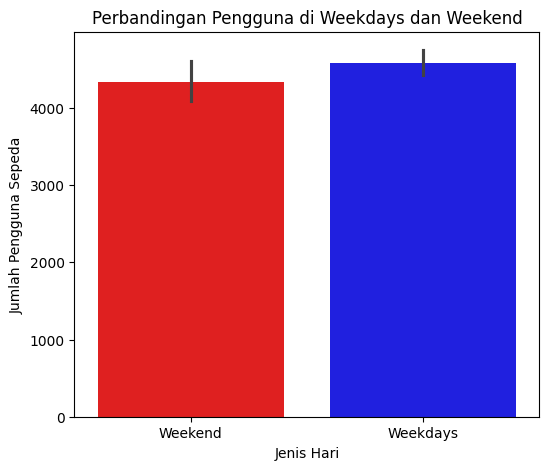

In [22]:
plt.figure(figsize=(6, 5))
sns.barplot(
    x='workingday',
    y='count',
    palette=['red', 'blue'],
    data=daysbd_df)

plt.title('Perbandingan Pengguna di Weekdays dan Weekend')
plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Mengacu pada hasil plot tersebut, didapatkan bahwa pengguna pada Weekdays lebih banyak dari pengguna pada Weekend, dengan rata-rata 4584 di Weekdays dan 4330 di Weekend. Hal ini disimpulkan bahwa penggunaan sepeda lebih banyak di hari biasa (Weekdays) dari akhir pekan (Weekend).

### Pertanyaan 2: Berapakah rata-rata angka peminjaman sepeda berdasarkan kondisi cuaca?

<ipython-input-23-f24b72a418e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='condition_weather',


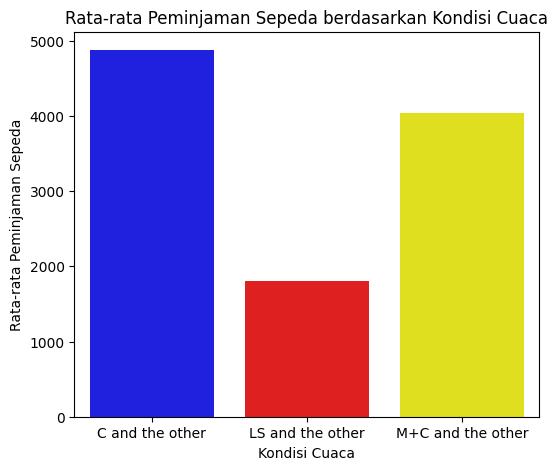

In [23]:
plt.figure(figsize=(6, 5))
sns.barplot(x='condition_weather',
            y='count',
            palette=['blue', 'red', 'yellow'],
            data=weather_counts)
plt.title('Rata-rata Peminjaman Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Peminjaman Sepeda')
plt.show()

Mengacu pada hasil plot tersebut, didapatkan rata-rata penggunaan sepeda yang bergantung pada cuaca. Dari ketiga data tersebut, pengendara sepeda terpaut banyak pada saat cuaca C and the other dengan angka 4876, disusul dengan cuaca M+C and the other dengan angka 4035, dan LS and the other dengan angka 1803 di posisi terakhir.

## Conclusion

- **Conclution pertanyaan 1** :
Setelah melalui proses analisis data, mulai dari Wrangling Data, hingga melakukan visualisasi data dan mengacu pada hasil plot data, didapatkan bahwa pengguna pada Weekdays lebih banyak dari pengguna pada Weekend, dengan rata-rata 4584 di Weekdays dan 4330 di Weekend. Hal ini disimpulkan bahwa penggunaan sepeda lebih banyak di hari biasa (Weekdays) dari akhir pekan (Weekend).
- **Conclution pertanyaan 2** :
Setelah melalui proses analisis data, mulai dari Wrangling Data, hingga melakukan visualisasi data dan mengacu pada hasil plot data, didapatkan rata-rata penggunaan sepeda yang bergantung pada cuaca. Dari ketiga data tersebut, pengendara sepeda terpaut banyak pada saat cuaca C and the other dengan angka 4876, disusul dengan cuaca M+C and the other dengan angka 4035, dan LS and the other dengan angka 1803 di posisi terakhir.